# 7. "win.zip" exercise

In [43]:
import pandas as pd

df = pd.read_csv("HW1_data/wine/wine.data", header = None)

print(df.head())
print(df.shape)
print(df.dtypes)

   0      1     2     3     4    5     6     7     8     9     10    11    12  \
0   1  14.23  1.71  2.43  15.6  127  2.80  3.06  0.28  2.29  5.64  1.04  3.92   
1   1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28  4.38  1.05  3.40   
2   1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81  5.68  1.03  3.17   
3   1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18  7.80  0.86  3.45   
4   1  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82  4.32  1.04  2.93   

     13  
0  1065  
1  1050  
2  1185  
3  1480  
4   735  
(178, 14)
0       int64
1     float64
2     float64
3     float64
4     float64
5       int64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13      int64
dtype: object


In [44]:
with open("HW1_data/wine/wine.names", "r") as f:
    for i in range(30):
        print(f.readline())

1. Title of Database: Wine recognition data

	Updated Sept 21, 1998 by C.Blake : Added attribute information



2. Sources:

   (a) Forina, M. et al, PARVUS - An Extendible Package for Data

       Exploration, Classification and Correlation. Institute of Pharmaceutical

       and Food Analysis and Technologies, Via Brigata Salerno, 

       16147 Genoa, Italy.



   (b) Stefan Aeberhard, email: stefan@coral.cs.jcu.edu.au

   (c) July 1991

3. Past Usage:



   (1)

   S. Aeberhard, D. Coomans and O. de Vel,

   Comparison of Classifiers in High Dimensional Settings,

   Tech. Rep. no. 92-02, (1992), Dept. of Computer Science and Dept. of

   Mathematics and Statistics, James Cook University of North Queensland.

   (Also submitted to Technometrics).



   The data was used with many others for comparing various 

   classifiers. The classes are separable, though only RDA 

   has achieved 100% correct classification.

   (RDA : 100%, QDA 99.4%, LDA 98.9%, 1NN 96.1% (z-transformed dat

In [45]:
cols = [
    "Class",
    "Alcohol",
    "Malic_acid",
    "Ash",
    "Alcalinity_of_ash",
    "Magnesium",
    "Total_phenols",
    "Flavanoids",
    "Nonflavanoid_phenols",
    "Proanthocyanins",
    "Color_intensity",
    "Hue",
    "OD280/OD315",
    "Proline"
]

df = pd.read_csv("HW1_data/wine/wine.data", names=cols)
print(df.head())

   Class  Alcohol  Malic_acid   Ash  Alcalinity_of_ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color_intensity   Hue  OD280/OD315  Proline  
0             5.64  1.04         3.92     1065  
1             4.38  1.05         3.40     1050  
2          

(a) Then, generate a plot between the Flavanoids and the Proline of the observations.
Label the axes (Flavanoids should be x-axis and Proline should be y-axis). Call this plot “Flavanoids and Proline Data”.

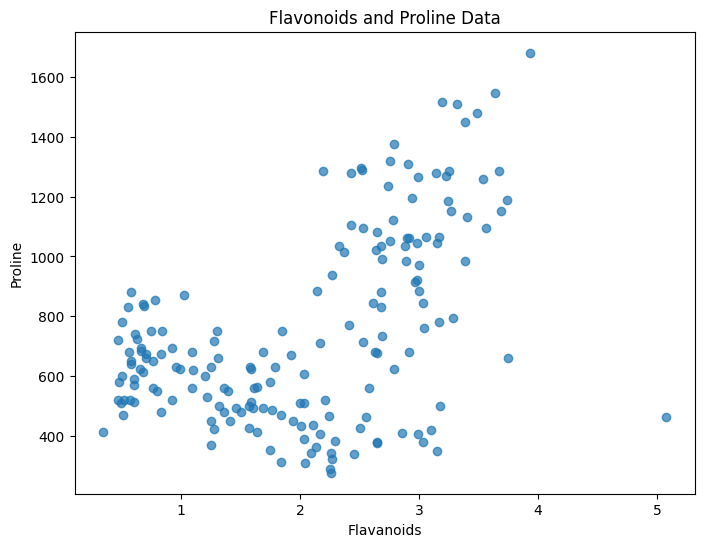

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df["Flavanoids"], df["Proline"], alpha=0.7)
plt.xlabel("Flavanoids")
plt.ylabel("Proline")
plt.title("Flavonoids and Proline Data")
plt.show()

The scatter plot of Flavanoids versus Proline shows a general positive correlation: as the Flavanoids value increases, the Proline value also tends to increase. This suggests that wines with higher Flavanoids content also tend to have higher Proline levels.

(b) Compute the mean of the attributes Flavanoids and Proline. Define a data point called P such that P = (mean(Flavanoids), mean(Proline)).

In [47]:
mean_flav = df["Flavanoids"].mean()
mean_prol = df["Proline"].mean()

P = (mean_flav, mean_prol)
print("Mean Flavanoids:", mean_flav)
print("Mean Proline:", mean_prol)
print("Point P:", P)

Mean Flavanoids: 2.0292696629213487
Mean Proline: 746.8932584269663
Point P: (np.float64(2.0292696629213487), np.float64(746.8932584269663))


(c) Compute the distance between P and the 178 data points using the following distance measures: 1) Euclidean distance, 2) Manhattan block metric, 3) Minkowski metric (for power=7), 4) Chebyshev distance, and 5) Cosine distance.
List the closest 6 points for each distance.

In [48]:
import numpy as np
from scipy.spatial import distance

X = df[["Flavanoids", "Proline"]].values

P = np.array([df["Flavanoids"].mean(), df["Proline"].mean()])

distances = {
    "Euclidean": [distance.euclidean(P, x) for x in X],
    "Manhattan": [distance.cityblock(P, x) for x in X],
    "Minkowski (p=7)": [distance.minkowski(P, x, 7) for x in X],
    "Chebyshev": [distance.chebyshev(P, x) for x in X],
    "Cosine": [distance.cosine(P, x) for x in X]
}

closest_points = {}
for metric, dists in distances.items():
    idx = np.argsort(dists)[:6]
    closest_points[metric] = idx

for metric, idx in closest_points.items():
    print(f"{metric} - Closest 6 points: {idx}")

Euclidean - Closest 6 points: [ 78  68 168 174 173   4]
Manhattan - Closest 6 points: [ 78  68 168 174 173   4]
Minkowski (p=7) - Closest 6 points: [ 78  68 168 174 173   4]
Chebyshev - Closest 6 points: [ 78 174  68 168 173   4]
Cosine - Closest 6 points: [32  2 54 48 91 22]


(d) For each distance measure, identify the 5 points from the dataset that are the closest to the point P from (b).

In [49]:
closest_points_5 = {}
for metric, dists in distances.items():
    idx = np.argsort(dists)[:5]
    closest_points_5[metric] = idx

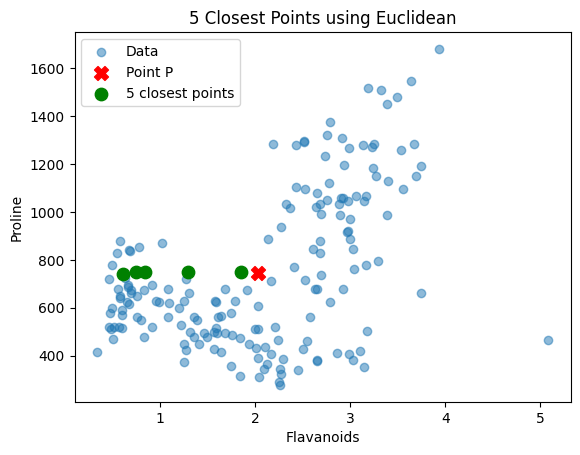

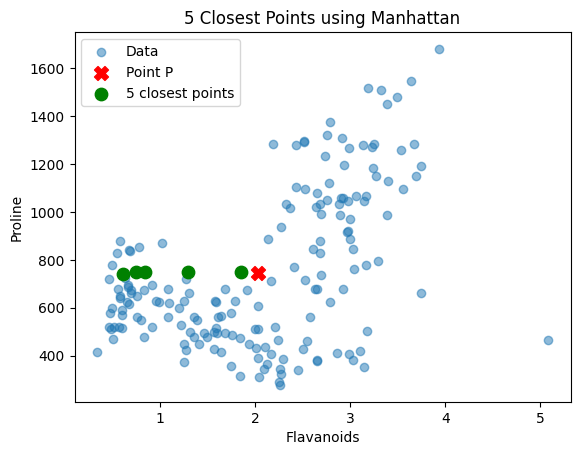

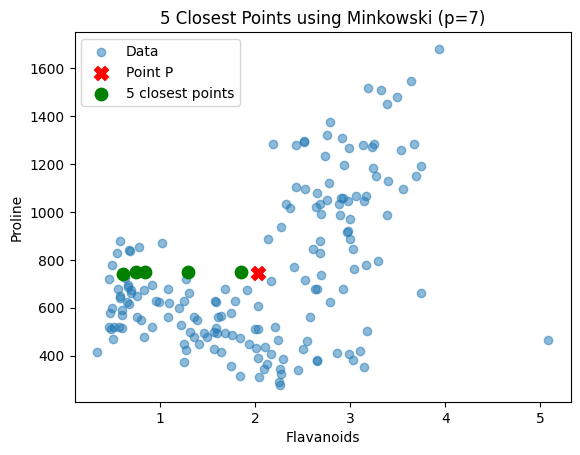

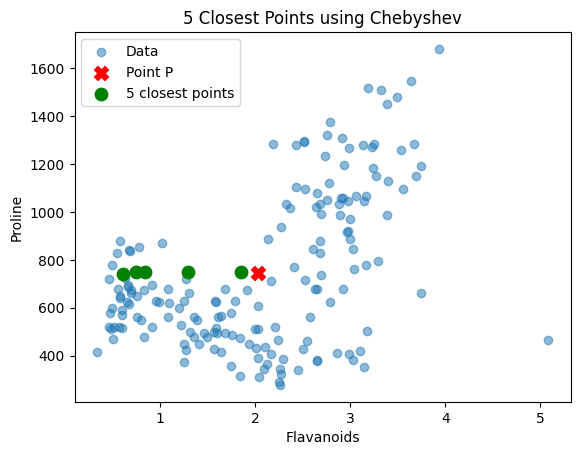

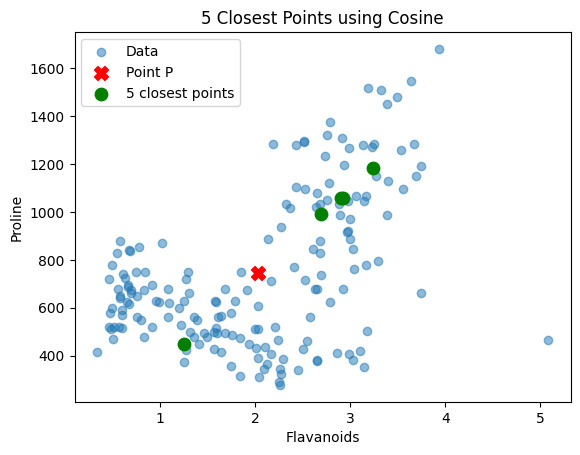

In [50]:
for metric, idx in closest_points_5.items():
    plt.figure()
    plt.scatter(df["Flavanoids"], df["Proline"], alpha=0.5, label="Data")
    plt.scatter(P[0], P[1], color="red", marker="X", s=100, label="Point P")
    plt.scatter(df.iloc[idx]["Flavanoids"], df.iloc[idx]["Proline"], 
                color="green", marker="o", s=80, label="5 closest points")
    plt.xlabel("Flavanoids")
    plt.ylabel("Proline")
    plt.title(f"5 Closest Points using {metric}")
    plt.legend()
    plt.show()

The four distance measures (Euclidean, Manhattan, Minkowski, and Chebyshev) selected almost the same nearest points, whereas the Cosine distance produced different results. This is because Cosine reflects directional similarity (ratios) rather than the magnitude of values.